# Earnings Based on College Majors
## Visualization and Examination

In this project we will at first visualize the differences in earnings based on the college majors and then try to examine and draw conclusions out of it. The is provided by [fivethirtyeight: college-majors](https://github.com/fivethirtyeight/data/tree/master/college-majors). The documentation can also be found there.

Here the description of the headers:

|Header|	Description|
|:------|:---------------|
|Rank|	Rank by median earnings|
|Major_code|	Major code, FO1DP in ACS PUMS|
|Major|	Major description|
|Major_category|	Category of major from Carnevale et al|
|Total|	Total number of people with major|
|Sample_size|	Sample size (unweighted) of full-time, year-round ONLY (used for earnings)|
|Men|	Male graduates|
|Women|	Female graduates|
|ShareWomen|	Women as share of total|
|Employed|	Number employed (ESR == 1 or 2)|
|Full_time|	Employed 35 hours or more|
|Part_time|	Employed less than 35 hours|
|Full_time_year_round|	Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)|
|Unemployed	Number| unemployed (ESR == 3)|
|Unemployment_rate|	Unemployed / (Unemployed + Employed)|
|Median|	Median earnings of full-time, year-round workers|
|P25th|	25th percentile of earnings|
|P75th|	75th percentile of earnings|
|College_jobs|	Number with job requiring a college degree|
|Non_college_jobs|	Number with job not requiring a college degree|
|Low_wage_jobs|	Number in low-wage service jobs|


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
recent_grads = pd.read_csv('recent-grads.csv')

In [127]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [128]:
recent_grads.head()


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Petroluem engineering is on rank 1. The top 5 are all engineering majors.

In [129]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Psychology and library science is at the lower end

In [130]:
recent_grads.tail(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
163,164,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,38279.0,1225.0,37054.0,Health,0.967998,95,29763,...,13862,14460,1487,0.047584,28000,20000,40000,19957,9404,5125
164,165,2307,EARLY CHILDHOOD EDUCATION,37589.0,1167.0,36422.0,Education,0.968954,342,32551,...,7001,20748,1360,0.040105,28000,21000,35000,23515,7705,2868
165,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.690111,56,7052,...,3685,3214,846,0.107116,27500,22900,38000,2326,3703,1115
166,167,6001,DRAMA AND THEATER ARTS,43249.0,14440.0,28809.0,Arts,0.666119,357,36165,...,15994,16891,3040,0.077541,27000,19200,35000,6994,25313,11068
167,168,3302,COMPOSITION AND RHETORIC,18953.0,7022.0,11931.0,Humanities & Liberal Arts,0.629505,151,15053,...,6612,7832,1340,0.081742,27000,20000,35000,4855,8100,3466
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Having a look at the lowest 10 we can find an aggregation of educational and psychological jobs

In [131]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


There seems to be 1 row having no data or imperfect data

In [132]:
recent_grads = recent_grads.dropna()

In [133]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


# Visualization of the data


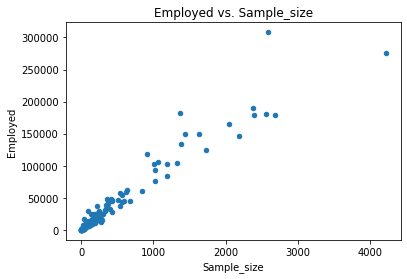

In [135]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size')

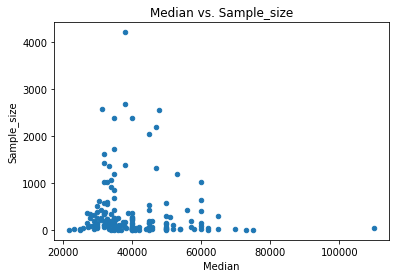

In [136]:
recent_grads.plot(x='Median', y= 'Sample_size', kind='scatter', title='Median vs. Sample_size')

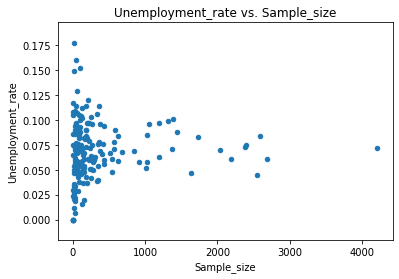

In [137]:
recent_grads.plot(x='Sample_size', y= 'Unemployment_rate', kind='scatter', title='Unemployment_rate vs. Sample_size')

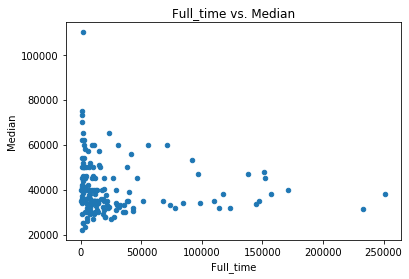

In [138]:
recent_grads.plot(x='Full_time', y= 'Median', kind='scatter', title='Full_time vs. Median')

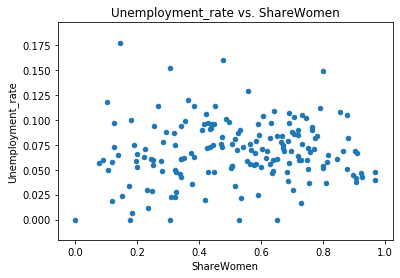

In [139]:
recent_grads.plot(x='ShareWomen', y= 'Unemployment_rate', kind='scatter', title='Unemployment_rate vs. ShareWomen')

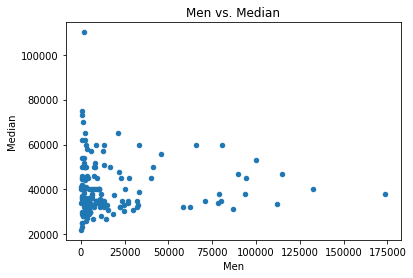

In [140]:
recent_grads.plot(x='Men', y= 'Median', kind='scatter', title='Men vs. Median')

Most of the men are working in a job with a median income below $40,000

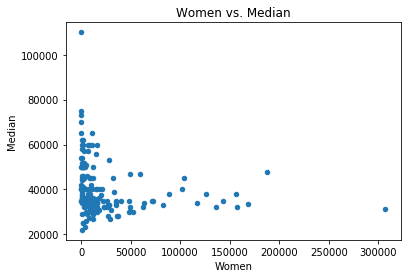

In [141]:
recent_grads.plot(x='Women', y= 'Median', kind='scatter', title='Women vs. Median')

Most of the women are working in a job with a median income below $40,000

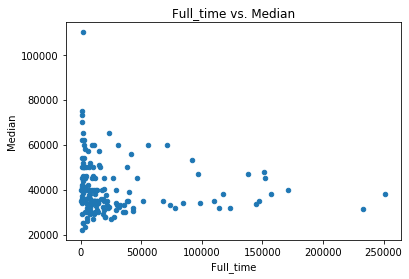

In [142]:
recent_grads.plot(x='Full_time', y= 'Median', kind='scatter', title='Full_time vs. Median')

## Histograms


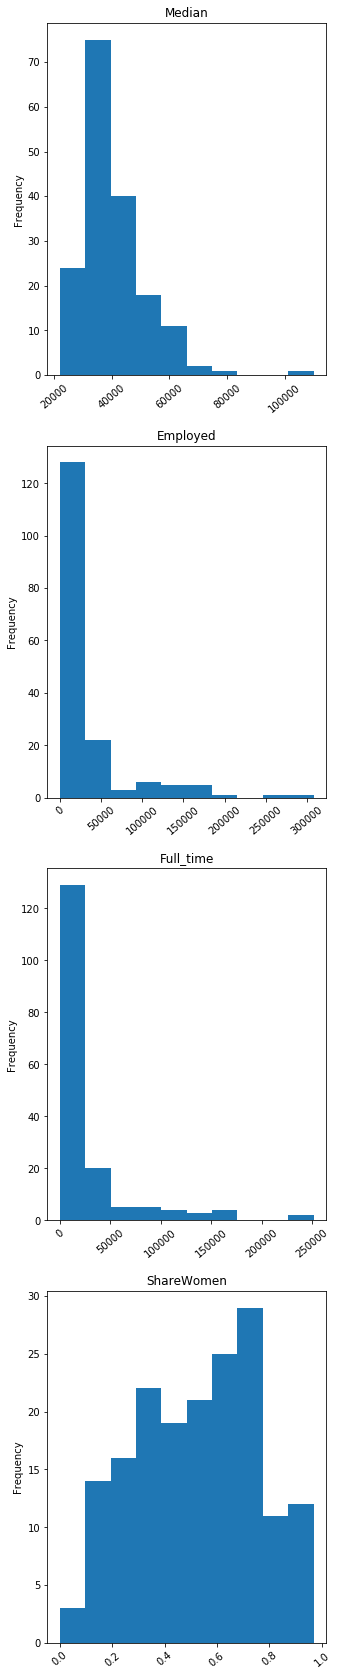

In [150]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r, title=cols[r])
    ax = fig.subplots_adjust(top = 2)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

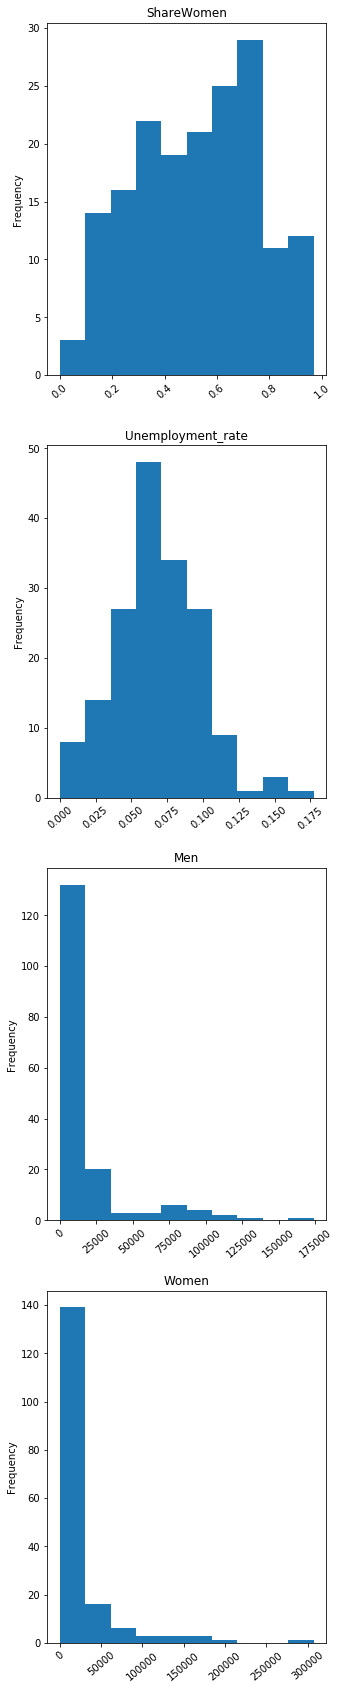

In [152]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3, title=cols[r])
    ax = fig.subplots_adjust(top = 2)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

In [109]:
recent_grads["Median"].value_counts(normalize = True, bins = 10)

(30800.0, 39600.0]      0.436047
(39600.0, 48400.0]      0.232558
(21911.999, 30800.0]    0.139535
(48400.0, 57200.0]      0.104651
(57200.0, 66000.0]      0.063953
(66000.0, 74800.0]      0.011628
(101200.0, 110000.0]    0.005814
(74800.0, 83600.0]      0.005814
(92400.0, 101200.0]     0.000000
(83600.0, 92400.0]      0.000000
Name: Median, dtype: float64

Most common medians range is 30,800 to 39,600 $ with 43,60% share

# Pandas, Scatter Matrix Plot



In [164]:
from pandas.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A04837248>,
      dtype=object)

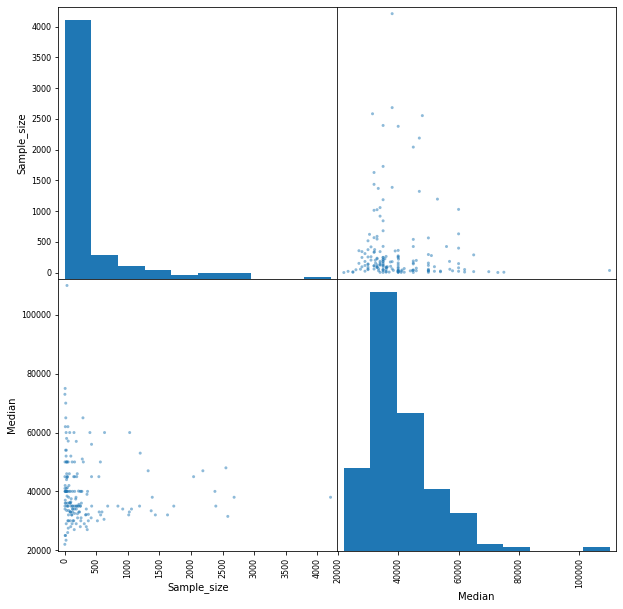

In [167]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

This make it even more clear that the **most common medians range** are somewhere in the area around 30,000 to 40,000 $

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A04BB7588>,
      dtype=object)

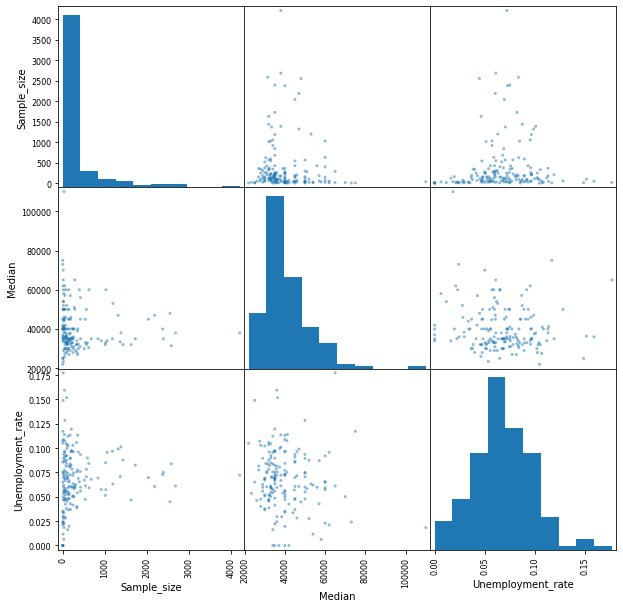

In [168]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

In [202]:
recent_grads['Sample_size'].value_counts(bins = 10)

(-2.211, 423.0]     138
(423.0, 844.0]       13
(844.0, 1265.0]       7
(1265.0, 1686.0]      5
(2528.0, 2949.0]      3
(2107.0, 2528.0]      3
(1686.0, 2107.0]      2
(3791.0, 4212.0]      1
(3370.0, 3791.0]      0
(2949.0, 3370.0]      0
Name: Sample_size, dtype: int64

In [203]:
samples = recent_grads[recent_grads['Sample_size']< 423]
samples

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [215]:
percentage_of_sample_size = recent_grads['Sample_size']/recent_grads['Total']
percentage_of_sample_size.value_counts(bins=10)

(0.00774, 0.0108]     58
(0.00468, 0.00774]    50
(0.0108, 0.0139]      32
(0.00058, 0.00468]    16
(0.0139, 0.0169]      13
(0.0169, 0.02]         2
(0.0292, 0.0323]       1
(0.0261, 0.0292]       0
(0.0231, 0.0261]       0
(0.02, 0.0231]         0
dtype: int64

Most sample_sizes vary between 0,7% and 1,7% of total

Can we conclude out of the very different sample sizes that
1. some occupational groups are more conversational than others 
or 
2.  in other cases that their employers do not allow to share information about their incomes
or 
3. in some cases that there were not  enough people asked?

In [258]:
most_graduates = recent_grads.sort_values(['Total'], ascending= False)
most_graduates.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,...,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
137,138,3301,ENGLISH LANGUAGE AND LITERATURE,194673.0,58227.0,136446.0,Humanities & Liberal Arts,0.700898,1436,149180,...,57825,81180,14345,0.087724,32000,23000,41000,57690,71827,26503
78,79,5506,POLITICAL SCIENCE AND GOVERNMENT,182621.0,93880.0,88741.0,Social Science,0.485930,1387,133454,...,43711,83236,15022,0.101175,38000,28000,50000,36854,66947,19803


In [211]:
women_share = recent_grads['ShareWomen'][recent_grads['ShareWomen'] > 0.50].sum()
women_share

66.908979504

 66.91 % of all majors have a women share of more than 50 %. Which means that 33.09 % of all majors have a women share of less than 50%. Which seems to be fair, because a share of 50% in every major is unlikely due to different distribution of men and women across the population and different interests. Some countries have more women and some have more men.

# Pandas Bar Plots

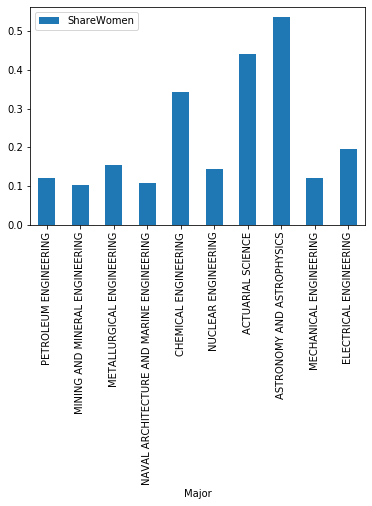

In [261]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

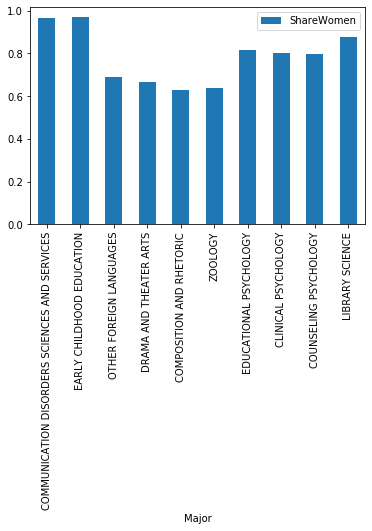

In [263]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

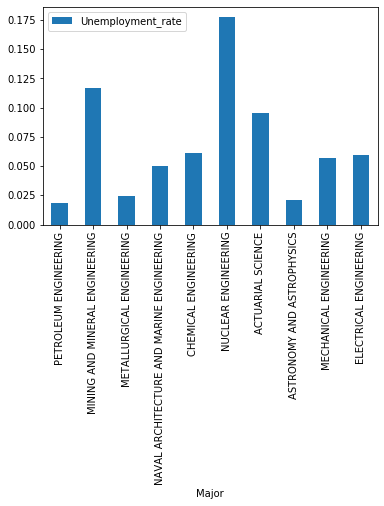

In [265]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

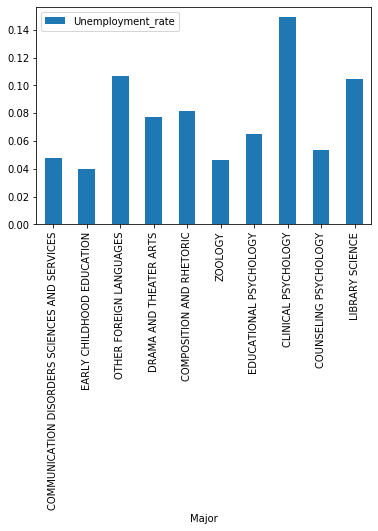

In [264]:
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

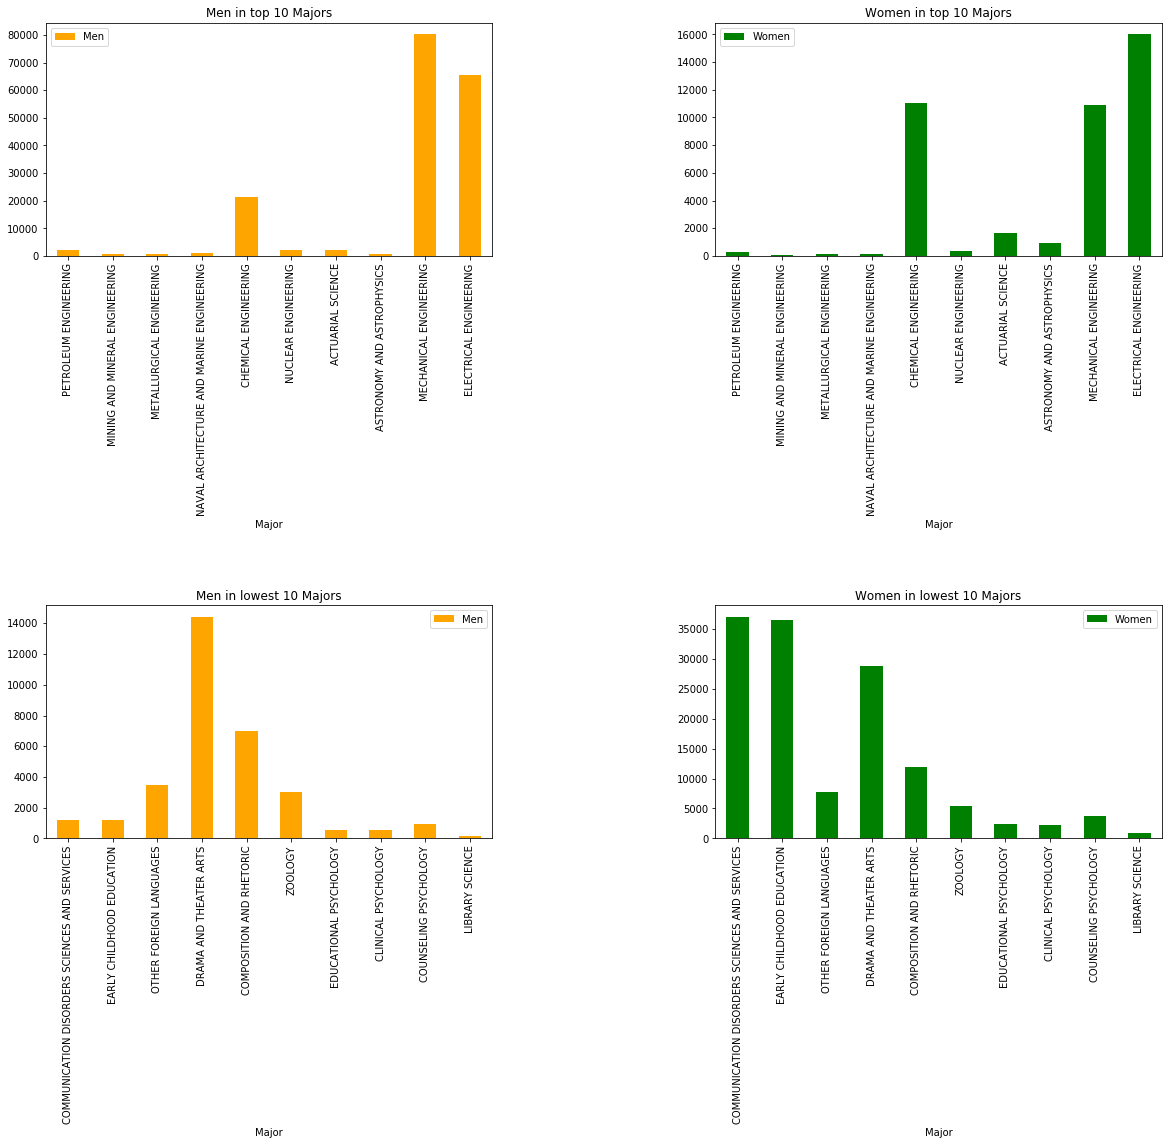

In [410]:


fig, axes = plt.subplots(nrows=2, ncols=2)

fig.subplots_adjust(wspace=0.5, hspace=1.5)

recent_grads[:10].plot.bar(x='Major', y='Men', ax=axes[0,0], figsize=(20,15), fontsize=10,title='Men in top 10 Majors', color='orange')
recent_grads[:10].plot.bar(x='Major', y='Women', ax=axes[0,1], figsize=(20,15), fontsize=10, title='Women in top 10 Majors', color = 'green')
recent_grads[-10:].plot.bar(x='Major', y='Men', ax=axes[1,0], figsize=(20,15), fontsize=10, title='Men in lowest 10 Majors', color='orange')
recent_grads[-10:].plot.bar(x='Major', y='Women', ax=axes[1,1], figsize=(20,15), fontsize=10, title='Women in lowest 10 Majors', color = 'green')

We have a much higher share of women in the 10 Majors with the lowest median income. Does that mean that women have lower claims than Men because they are already pleased with less and rather choose their Major related to their interests than for the possible salary? Or does it mean that women are underpaid and get exploited? Or does ite even mean that men are overpaid? The truth probably lays somewhere in between.